In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
df=pd.read_csv('books.csv')
df.head()

,1668404433844,74.4000015258789,433
0,1668404434091,76.000000,433.000000
1,1668404434099,78.400002,433.000000
2,1668404434113,88.000000,433.800018
3,1668404434130,100.000000,433.800018
4,1668404434147,116.000000,433.800018


In [115]:
data=df.to_numpy()

In [116]:
data1=data[:,0]

In [143]:
seperations=[0]
for i in range(len(data1)-1):
    if (data1[i+1]-data1[i])>=515:
        seperations.append(i)
    else:
        pass

In [161]:
segments=[]
for i in range(len(seperations)-1):
    segments.append(data[(seperations[i]+5):(seperations[i+1]-5)])

In [162]:
def dx(i): return dat.x[i]-dat.x[i-1]
def dy(i): return dat.y[i]-dat.y[i-1]
def dt(i): return dat.time[i]-dat.time[i-1]
def theta(i):
    feature=0
    feature=math.atan2(dx(i+1)*dy(i)-dx(i)*dy(i+1),dx(i+1)*dx(i)+dy(i+1)*dy(i))
    return feature
def sigma(start, end, fun): return sum([fun(i) for i in range(start, end)])
def rf1(d): return (d.x[2]-d.x[0])/math.sqrt((d.y[2]-d.y[0])**2+(d.x[2]-d.x[0])**2)
def rf2(d): return (d.y[2]-d.y[0])/math.sqrt((d.y[2]-d.y[0])**2+(d.x[2]-d.x[0])**2)
def rf3(d): return math.sqrt((max(d.y)-min(d.y))**2+(max(d.x)-min(d.x))**2)
def rf4(d): return math.atan2(max(d.y)-min(d.y), max(d.x)-min(d.x))
def rf5(d): return math.sqrt((d.x[len(d)-1]-d.x[0])**2+(d.y[len(d)-1]-d.y[0])**2)
def rf6(d): return (d.x[len(d)-1]-d.x[0])/rf5(d)
def rf7(d): return (d.y[len(d)-1]-d.y[0])/rf5(d)
def rf8(d): return sigma(1, len(d), lambda i: math.sqrt(dx(i)**2+dy(i)**2))
def rf9(d): return sigma(1, len(d)-1, theta)
def rf10(d): return sigma(1, len(d)-1, lambda i: abs(theta(i)))
def rf11(d): return sigma(1, len(d)-1, lambda i: theta(i)**2)
def rf12(d): return max([(dx(i)**2+dy(i)**2)/dt(i)**2 if dt(i) > 0 else 0 for i in range(1, len(d))])
def rf13(d): return d.time[len(d)-1]-d.time[0]

In [163]:
df_list=[]
for i in segments:
    df_list.append(pd.DataFrame(i,columns=['time','x','y']))

In [164]:
stroke_features=[]
for i in range(len(df_list)):
    temp=[]
    dat=df_list[i]
    f1=rf1(df_list[i])
    f2=rf2(df_list[i])
    f3=rf3(df_list[i])
    f4=rf4(df_list[i])
    f5=rf5(df_list[i])
    f6=rf6(df_list[i])
    f7=rf7(df_list[i])
    f8=rf8(df_list[i])
    f9=rf9(df_list[i])
    f10=rf10(df_list[i])
    f11=rf11(df_list[i])
    f12=rf12(df_list[i])
    f13=rf13(df_list[i])
    temp+=[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13]
    stroke_features.append(temp)

In [165]:
df=pd.DataFrame(stroke_features,columns=['rf1','rf2','rf3','rf4','rf5','rf6','rf7','rf8','rf9','rf10','rf11','rf12','rf13'])

In [166]:
df

,rf1,rf2,rf3,rf4,rf5,rf6,rf7,rf8,rf9,rf10,rf11,rf12,rf13
0,0.998274,0.058726,417.649054,0.015325,417.637560,0.999910,-0.013409,417.983516,5.551115e-17,0.864577,0.101715,1.210001,917.0
1,0.000000,1.000000,78.436720,1.540194,78.436720,0.030598,0.999532,79.192557,0.000000e+00,3.141593,2.169044,0.079723,940.0
2,-1.000000,0.000000,139.232161,0.817907,25.799230,0.992278,-0.124035,299.112150,6.283185e+00,42.418213,34.705722,0.145001,2233.0
3,0.000000,1.000000,72.800049,1.570796,72.800049,0.000000,1.000000,72.800049,0.000000e+00,0.000000,0.000000,0.040000,833.0
4,0.966233,0.257668,153.120140,0.644546,56.664696,-0.225890,0.974153,347.736083,3.747155e+00,38.267740,36.176281,0.400831,1932.0
5,0.707080,-0.707134,377.249041,0.048794,377.249041,0.998810,-0.048774,381.735615,8.326673e-17,15.586029,20.444929,1.124999,1200.0
6,0.000000,1.000000,198.201496,0.696806,5.122507,0.624697,-0.780868,532.391418,5.819547e+00,43.738748,40.855465,0.338824,4199.0
7,-1.000000,0.000000,124.702514,0.721848,14.945227,0.963518,0.267644,274.144832,6.283185e+00,42.003528,31.921107,0.150588,2066.0
8,0.000000,-1.000000,106.192286,1.465131,106.192286,-0.105469,-0.994423,107.749135,-1.110223e-16,4.588215,1.858277,0.122500,917.0
9,1.000000,0.000000,151.538240,0.316742,8.504093,-0.752574,-0.658507,327.021851,4.712389e+00,55.493629,51.396102,0.108514,4107.0


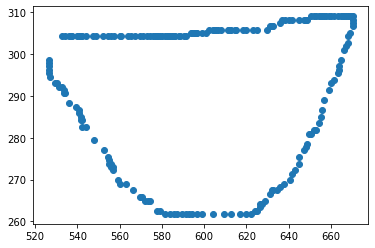

In [175]:
a=segments[9]
plt.scatter(a[:,1],a[:,2])